In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Baca data yang akan digunakan

machine_learning = pd.read_csv("/content/drive/MyDrive/HasilGabunganMachinelearning.csv", sep=',', decimal=',')

In [18]:
# Cek

print(machine_learning.head())

              Nama_Kota Curah_Hujan_(mm)  Produksi_Padi_2021  \
0   Kabupaten Bangkalan            56.78           195323.29   
1  Kabupaten Banyuwangi            14.75           513490.07   
2      Kabupaten Blitar             27.6           247366.27   
3      Kabupaten Blitar             27.6             5793.30   
4  Kabupaten Bojonegoro            29.56           674002.00   

   Produksi_Padi_2022  Produksi_Padi_2023  
0           198122.71           186257.96  
1           462205.98           454768.46  
2           215482.79           240224.41  
3             5212.13             5636.68  
4           704288.94           705962.63  


In [16]:
# melihat Info data

machine_learning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nama_Kota           2028 non-null   object 
 1   Curah_Hujan_(mm)    2028 non-null   object 
 2   Produksi_Padi_2021  2028 non-null   float64
 3   Produksi_Padi_2022  2028 non-null   float64
 4   Produksi_Padi_2023  2028 non-null   float64
dtypes: float64(3), object(2)
memory usage: 79.3+ KB


In [19]:
# MEngecek Isi nilai null

machine_learning.isnull().sum()

,0
Nama_Kota,0
Curah_Hujan_(mm),0
Produksi_Padi_2021,0
Produksi_Padi_2022,0
Produksi_Padi_2023,0


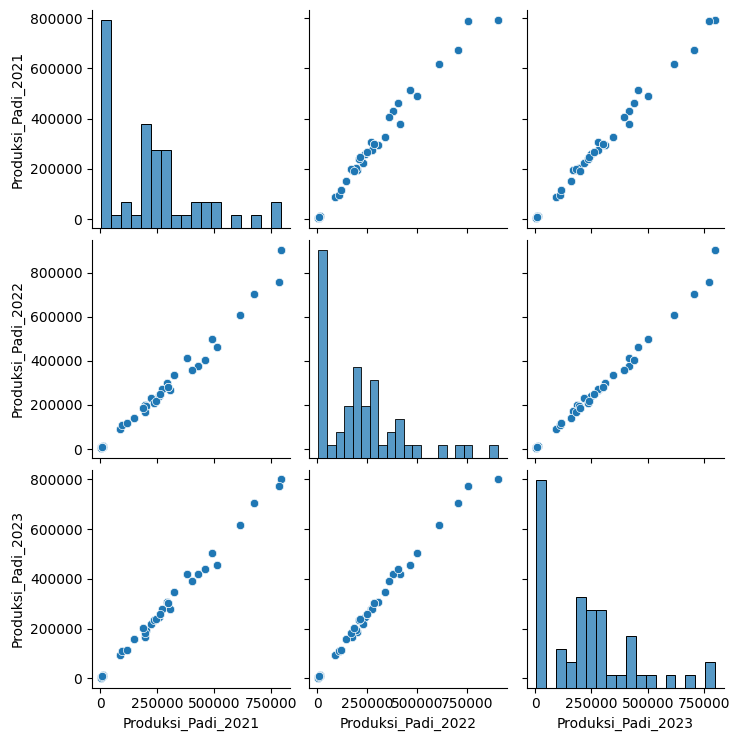

In [20]:
# Mengecek
sns.pairplot(machine_learning)
plt.show()

Training Data

In [23]:
# Membuat persiapan untuk data model

X = machine_learning[['Curah_Hujan_(mm)']]
y = machine_learning['Produksi_Padi_2023']

# Split Data untuk 80% train dan 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Model regresi linear

model = LinearRegression()
model.fit(X_train, Y_train)

print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)

Koefisien: [-550.41348585]
Intercept: 231730.6992028445


In [26]:
# membuat prediksi data objekl

y_prediksi = model.predict(X_test)

In [28]:
# Evaluasi
mse = mean_squared_error(Y_test, y_prediksi)
r2 = r2_score(Y_test, y_prediksi)

print("Mean Squared Error:", mse)
print("R-squared (R²):", r2)

Mean Squared Error: 42877802361.58688
R-squared (R²): -0.004524131944189769


Visualisasi

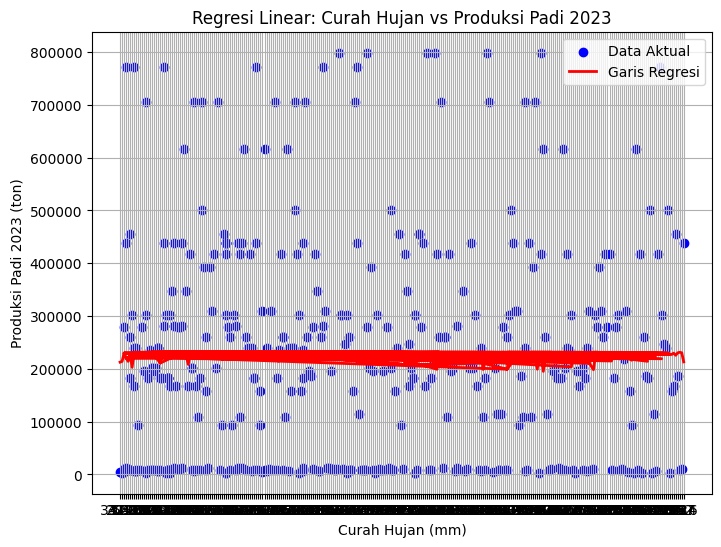

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Curah_Hujan_(mm)'], Y_test, color='blue', label='Data Aktual')
plt.plot(X_test['Curah_Hujan_(mm)'], y_prediksi, color='red', linewidth=2, label='Garis Regresi')

plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Produksi Padi 2023 (ton)')
plt.title('Regresi Linear: Curah Hujan vs Produksi Padi 2023')
plt.legend()
plt.grid(True)
plt.show()


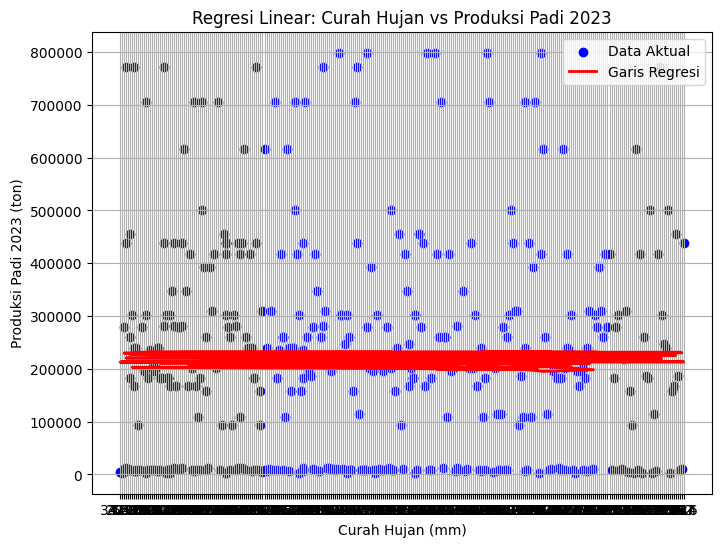

In [34]:
# Urutkan untuk visualisasi yang rapi
urutkan = X_test['Curah_Hujan_(mm)'].argsort()

plt.figure(figsize=(8, 6))
plt.scatter(X_test['Curah_Hujan_(mm)'], Y_test, color='blue', label='Data Aktual')
plt.plot(
    X_test['Curah_Hujan_(mm)'].values[urutkan],
    y_prediksi[urutkan],
    color='red',
    linewidth=2,
    label='Garis Regresi'
)

plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Produksi Padi 2023 (ton)')
plt.title('Regresi Linear: Curah Hujan vs Produksi Padi 2023')
plt.legend()
plt.grid(True)
plt.show()


Untuk Contoh prediksi 2025 berdasarkan hasil curah hujan


In [40]:
# Prediksi hasil produksi padi berdasarkan curah hujan harian berdasakan produuksi

nama_kabupaten = ['Surabaya', 'madiun', 'kediri', 'ngawi', 'probolinggo']
Curah_Hujan_Harian = np.array([[32.3], [5.80], [5.84], [5.80], [0.13]])

# prediksi hasil
hasil_produksi = model.predict(Curah_Hujan_Harian)

# Tampilkan Hasil
for i in range(len(nama_kabupaten)):
    print(f"Nama Kabupaten: {nama_kabupaten[i]:<12} | Curah Hujan: {Curah_Hujan_Harian[i][0]:>5.2f} mm → Prediksi Produksi: {hasil_produksi[i]:,.2f} ton")

Nama Kabupaten: Surabaya     | Curah Hujan: 32.30 mm → Prediksi Produksi: 213,952.34 ton
Nama Kabupaten: madiun       | Curah Hujan:  5.80 mm → Prediksi Produksi: 228,538.30 ton
Nama Kabupaten: kediri       | Curah Hujan:  5.84 mm → Prediksi Produksi: 228,516.28 ton
Nama Kabupaten: ngawi        | Curah Hujan:  5.80 mm → Prediksi Produksi: 228,538.30 ton
Nama Kabupaten: probolinggo  | Curah Hujan:  0.13 mm → Prediksi Produksi: 231,659.15 ton


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
